## Heart Disease Prediction Application 

Huntington Hospital is attempting to modernize their heart disease prediction protocols and have decided to implement a machine learning model that will predict heart disease in patients with an accuracy over 95%. This application will detail the steps necessary to provide such a model, along with visualizations that will provide better context and clarity in relation to the data being processed 

First, the necessary libraries for machine learning and visualization models are imported 

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

The requisite csv file containing patient data is then stored as a pandas dataframe in the "heart_info" variable. The first five rows of patient data are displayed to ensure the csv data transfer was succesful.  

In [2]:
heart_info = pd.read_csv("heart.csv")
heart_info.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


A histogram is shown displaying the relationship between age and the number of patients who have heart disease, with red bars representing patients with heart disease, and blue bars representing patients without heart disease. From the histogram, it is apparent that the 'age' independent variable could have an impact on the machine learning model, as the target variables noticeably differ with relation to age. 

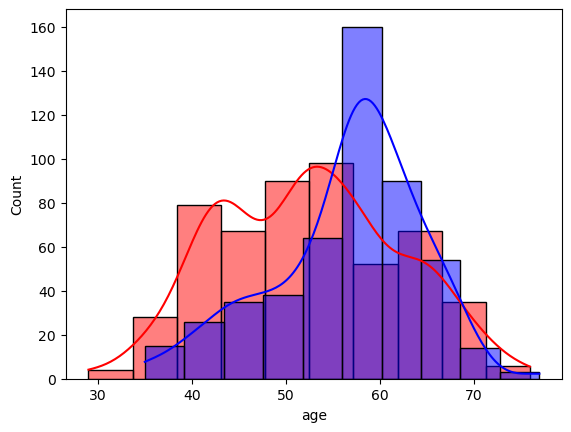

In [3]:
A = heart_info[heart_info['target'] == 1]['age']
B = heart_info[heart_info['target'] == 0]['age']


sns.histplot(A, color = 'red', kde=True, bins = 10)
sns.histplot(B, color ='blue', kde=True, bins = 10)

plt.show()

A histogram is shown displaying the relationship between resting blood pressure and the number of patients who have heart disease, with red bars representing patients with heart disease, and blue bars representing patients without heart disease. From the histogram, it is apparent that the resting blood pressure independent variable could have an impact on the machine learning model, as the target variables differ with relation to resting blood pressure.

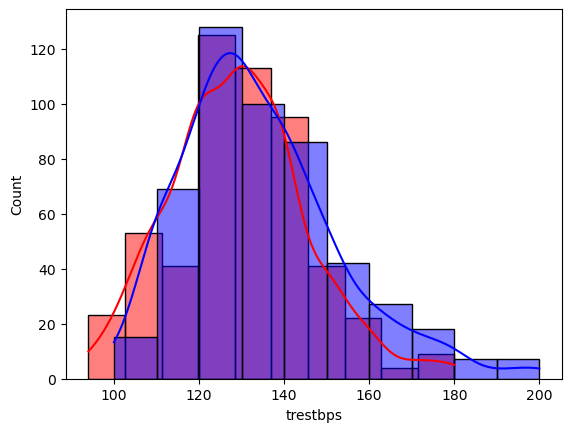

In [4]:
C = heart_info[heart_info['target'] == 1]['trestbps']
D = heart_info[heart_info['target'] == 0]['trestbps']


sns.histplot(C, color = 'red', kde=True, bins = 10)
sns.histplot(D, color ='blue', kde=True, bins = 10)

plt.show()

A histogram is shown displaying the relationship between cholesterol and the number of patients who have heart disease, with red bars representing patients with heart disease, and blue bars representing patients without heart disease. From the histogram, it is apparent that the cholesterol independent variable could have an impact on the machine learning model, as the target variables noticeably differ with relation to cholesterol.

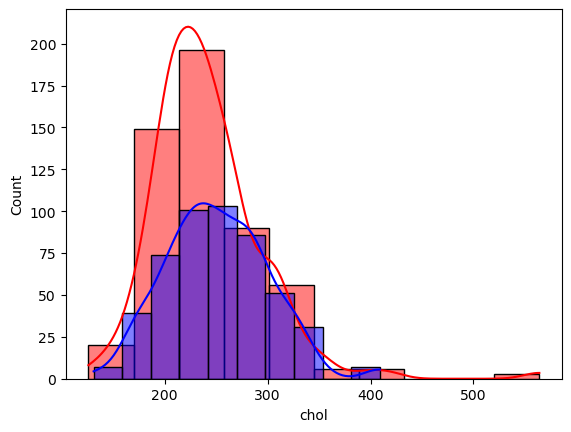

In [5]:
E = heart_info[heart_info['target'] == 1]['chol']
F = heart_info[heart_info['target'] == 0]['chol']


sns.histplot(E, color = 'red', kde=True, bins = 10)
sns.histplot(F, color ='blue', kde=True, bins = 10)

plt.show()

A histogram is shown displaying the relationship between max heart rate and the number of patients who have heart disease, with red bars representing patients with heart disease, and blue bars representing patients without heart disease. From the histogram, it is apparent that the max heart rate independent variable could have an impact on the machine learning model, as the target variables noticeably differ with relation to max heart rate.

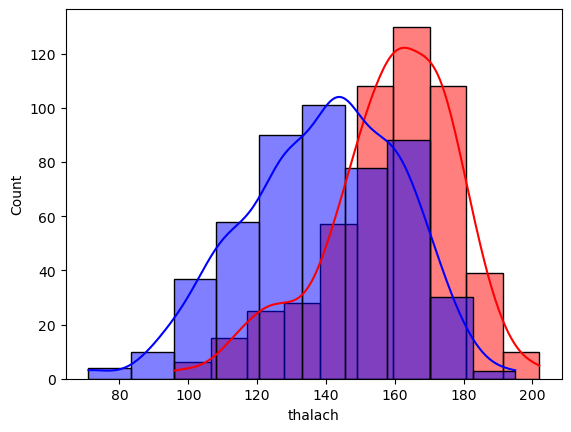

In [6]:
G = heart_info[heart_info['target'] == 1]['thalach']
H = heart_info[heart_info['target'] == 0]['thalach']


sns.histplot(G, color = 'red', kde=True, bins = 10)
sns.histplot(H, color ='blue', kde=True, bins = 10)

plt.show()

A scatter plot is shown to further illustrate the impact max heart rate could have on the machine learning model. Especially considering the mean lines, and the difference between the orange heart disease patients and the blue patients without heart disease, this could mean that max heart rate would be a significant independent variable in a machine learning model.

Max Heart Rate Vs. Age Scatter Plot


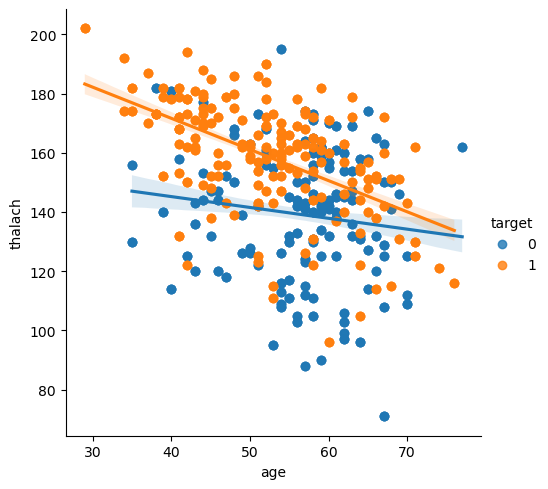

In [7]:
print("Max Heart Rate Vs. Age Scatter Plot")
sns.lmplot(x='age', y='thalach', data=heart_info, hue='target')
title = ""

The train_test_split class is imported from sklearn in order to properly split the processed data into the necessary training and test data splits. A random seed is implemented in order to provide consistent results independent of when or where the application is deployed.

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(27)

X = heart_info.drop("target", axis=1)
y = heart_info["target"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.4)

The RandomForestClassifier class is imported from sklearn. The variable "clf" is then assigned to a RandomForestClassifier object with the number of estimators set to 4. The RandomForestClassifier is then fit to the training data

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4)

clf.fit(X_train, y_train);

The model is then scored based on the test data, yielding a result of around 95% accuracy. 

In [10]:
clf.score(X_test, y_test)

0.9536585365853658

A confusion matrix is displayed based on the results of the RandomForestClassifier model. From the matrix displayed, it is apparent the model is highly accurate, although the false negative rate is about four times that of the false positive rate. 

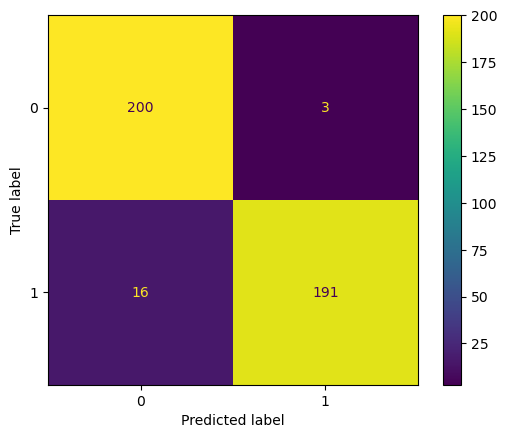

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

y_preds = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

An interface is implemented using widgets in order for a user to input patient data values and receive relevant predictions. 

In [12]:
from ipywidgets import widgets

age_widget = widgets.IntSlider(value = 40, min = 0, max = 100, step = 1, description = "Age: ")
sex_widget = widgets.Dropdown(options = [('Male', 1), ('Female', 0)], value = 1, description = "Sex: ")
chest_pain_widget = widgets.Dropdown(options = [0, 1, 2, 3] , value = 0, description = "Chest Pain: ")
resting_bp_widget = widgets.IntSlider(value = 120, min = 70, max = 230, step = 1, description = "Rest BP: ")
chol_widget = widgets.BoundedIntText(value = 250, min = 100, max = 600, step = 1, description = "Chol: ")
fbs_widget = widgets.Dropdown(options = [('Yes', 1), ('No', 0)], value = 0, description = "FBS > 120:  ")
rest_ecg_widget = widgets.Dropdown(options = [0, 1, 2] , value = 0, description = "Rest ECG: ")
thalach_widget = widgets.IntSlider(value = 120, min = 50, max = 250, step = 1, description = "Thalach: ")
eia_widget = widgets.Dropdown(options = [('Yes', 1), ('No', 0)], value = 0, description = "EIA: ")
old_peak_widget = widgets.FloatSlider(value = 2.0, min = 0.0, max = 7.0, step = 0.1, description = "Oldpeak: ")
slope_widget = widgets.Dropdown(options = [0, 1, 2] , value = 0, description = "Slope: ")
ca_widget = widgets.Dropdown(options = [0, 1, 2, 3, 4] , value = 0, description = "CA: ")
thal_widget = widgets.Dropdown(options = [0, 1, 2, 3] , value = 0, description = "Thal: ")

predict_button = widgets.Button( description='Predict' )
prediction_output = widgets.Label(value='')

def on_click_predict(b):
    prediction = clf.predict([[age_widget.value, sex_widget.value, chest_pain_widget.value, 
                               resting_bp_widget.value, chol_widget.value, fbs_widget.value, 
                               rest_ecg_widget.value, thalach_widget.value, eia_widget.value, 
                               old_peak_widget.value, slope_widget.value, ca_widget.value, 
                               thal_widget.value
        ]])
    if prediction[0] == 1: 
        prediction_output.value = 'This patient is predicted to have a POSITIVE heart disease diagnosis'
    else:
        prediction_output.value = 'This patient is predicted to have a NEGATIVE heart disease diagnosis'
predict_button.on_click(on_click_predict)


vb=widgets.VBox([age_widget, sex_widget, chest_pain_widget, resting_bp_widget, chol_widget, 
                 fbs_widget, rest_ecg_widget, thalach_widget, eia_widget, old_peak_widget,
                slope_widget, ca_widget, thal_widget, predict_button, prediction_output])
print("Adjust values and make a prediction.")
display(vb)

Adjust values and make a prediction.
